In [1]:
import math
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

In [2]:
# define option price and delta
def euro_OptionPrice_Delta(S0, K, Matur, r, sigma, option_type):
    
    #S0: stock price
    #sigma: volatility
    #K: strike price
    #r: return
    #T: time to maturity
       
    if option_type == 'call':
        if Matur==0:
            price = max(S0-K, 0)
            
            if np.log(S0/K) > 0:
                delta = 1
            else:
                delta = 0
        else:
            
            d1 = (np.log(S0/K) + (r + sigma ** 2 * 0.5))/sigma/np.sqrt(Matur)
            d2 = (np.log(S0/K) + (r - sigma ** 2 * 0.5))/sigma/np.sqrt(Matur)
            
            price = S0 * si.norm.cdf(d1, 0, 1) - K * np.exp(-r * Matur) * si.norm.cdf(d2, 0, 1)
            delta = si.norm.cdf(d1, 0, 1)
        
#     if option_type == 'put':
#         if T==0:
#             price = 
#             delta = 
#         else:
#             price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0, 1) - S0 * si.norm.cdf(-d1, 0, 1)
#             delta = -si.norm.cdf(-d1, 0, 1)
        
    return price, delta

In [87]:
option_type = "call" # Put or Call
S0 = 100.0
T = 1.0
K = 110
r = 0.05
mu = 0.1
sigma = 0.2
N_hedges = 100
Total_simulations = 50
dT = T / N_hedges

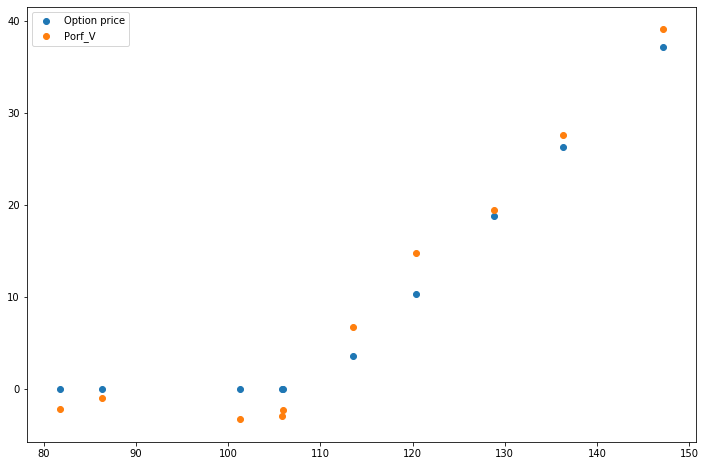

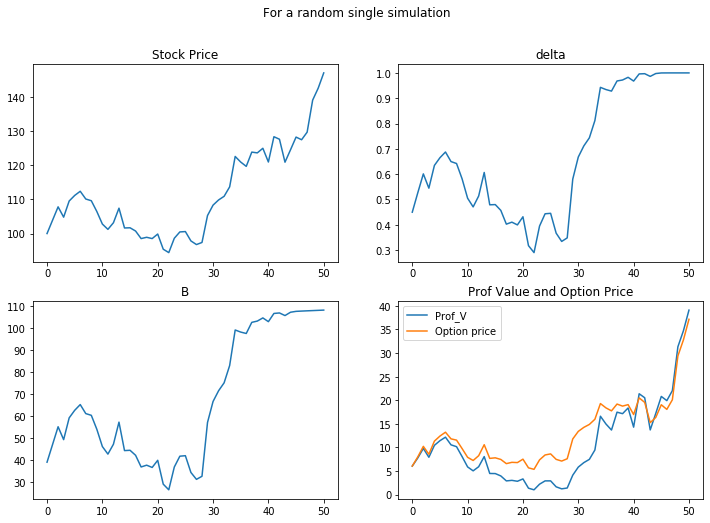

tracking error ave:  2.5512742800597503


In [85]:
#long call, short stocks

Porf_V_array = np.zeros((Total_simulations, N_hedges+1))
delta_array = np.zeros((Total_simulations, N_hedges+1))
B_array = np.zeros((Total_simulations, N_hedges+1))
S_array = np.zeros((Total_simulations, N_hedges+1))
option_price_array = np.zeros((Total_simulations, N_hedges+1))

for j in range(Total_simulations):
    S = S0
    delta = euro_OptionPrice_Delta(S, K, T, r, sigma, option_type)[1]
    V = euro_OptionPrice_Delta(S, K, T, r, sigma, option_type)[0] 
    B = delta*S-V
   

    Porf_V_array[j,0] = V
    delta_array[j,0] = delta
    B_array[j,0] = B
    S_array[j,0] = S
    option_price_array[j,0] = V

    for i in range(N_hedges):

        epslon = np.random.normal(0,1)
        S = S_array[j,i]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*epslon)
        
        

        option_price = euro_OptionPrice_Delta(S, K, T-(i+1)*dT, r, sigma, option_type)[0]
        delta_new = euro_OptionPrice_Delta(S, K, T-(i+1)*dT, r, sigma, option_type)[1]
        B = S*(delta_new - delta_array[j,i])  + B_array[j,i]*np.exp(r*dT)
        V = delta_new*S - B
        
        
        Porf_V_array[j,i+1] = V
        delta_array[j,i+1] = delta_new
        B_array[j,i+1] = B
        S_array[j,i+1] = S
        option_price_array[j,i+1] = option_price


        
        
        
plt.figure(1,figsize=(12,8))
plt.scatter(S_array[:,-1],option_price_array[:,-1], label = 'Option price')
plt.scatter(S_array[:,-1],Porf_V_array[:,-1], label = 'Porf_V')
plt.legend()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('For a random single simulation')
num = 5
axs[0, 0].plot(S_array[num,:])
axs[0, 0].set_title('Stock Price')
axs[0, 1].plot(delta_array[num,:])
axs[0, 1].set_title('delta')
axs[1, 0].plot(B_array[num,:])
axs[1, 0].set_title('B')
axs[1, 1].plot(Porf_V_array[num,:], label = 'Prof_V')
axs[1, 1].plot(option_price_array[num,:], label = 'Option price')
axs[1, 1].set_title('Prof Value and Option Price') 
plt.legend()
plt.show()

print("tracking error ave: ",np.sqrt(sum((option_price_array[:,-1]- Porf_V_array[:,-1])**2)/Total_simulations) )


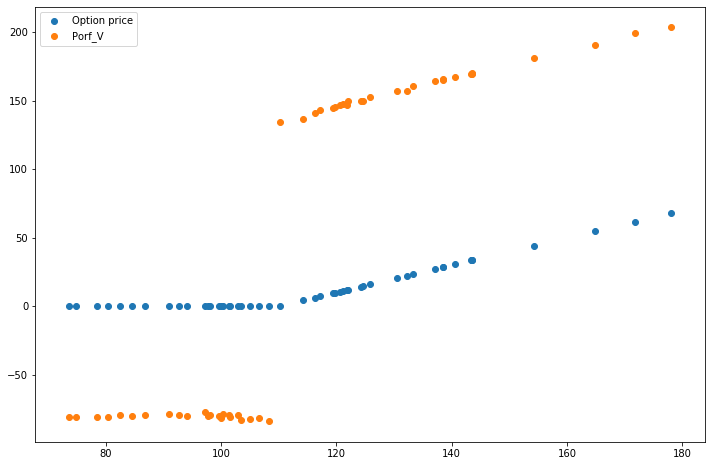

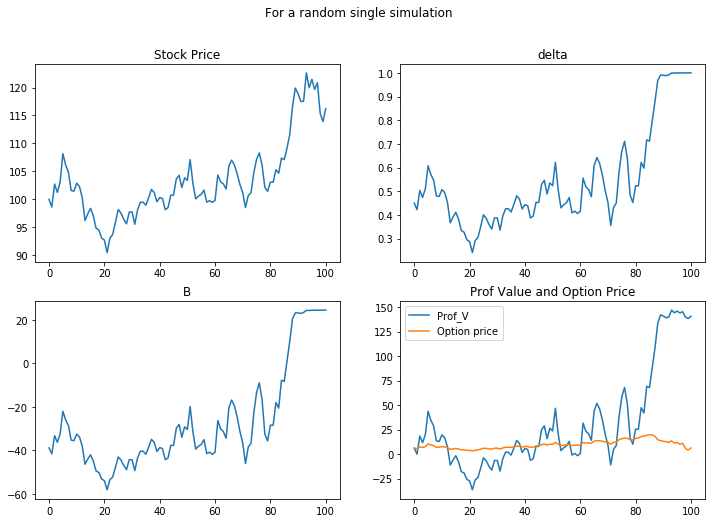

In [88]:
#short call, long stocks

Porf_V_array = np.zeros((Total_simulations, N_hedges+1))
delta_array = np.zeros((Total_simulations, N_hedges+1))
B_array = np.zeros((Total_simulations, N_hedges+1))
S_array = np.zeros((Total_simulations, N_hedges+1))
option_price_array = np.zeros((Total_simulations, N_hedges+1))

for j in range(Total_simulations):
    S = S0
    delta = euro_OptionPrice_Delta(S, K, T, r, sigma, option_type)[1]
    V = euro_OptionPrice_Delta(S, K, T, r, sigma, option_type)[0] 
    B = V - delta*S
   

    Porf_V_array[j,0] = V
    delta_array[j,0] = delta
    B_array[j,0] = B
    S_array[j,0] = S
    option_price_array[j,0] = V

    for i in range(N_hedges):

        epslon = np.random.normal(0,1)
        S = S_array[j,i]*np.exp((mu-0.5*sigma**2)*dT+sigma*np.sqrt(dT)*epslon)
        
        

        option_price = euro_OptionPrice_Delta(S, K, T-(i+1)*dT, r, sigma, option_type)[0]
        delta_new = euro_OptionPrice_Delta(S, K, T-(i+1)*dT, r, sigma, option_type)[1]
        B = S*(delta_new - delta_array[j,i])  + B_array[j,i]*np.exp(r*dT)
        V = delta_new*S + B
        
        
        Porf_V_array[j,i+1] = V
        delta_array[j,i+1] = delta_new
        B_array[j,i+1] = B
        S_array[j,i+1] = S
        option_price_array[j,i+1] = option_price


        
        
        
plt.figure(1,figsize=(12,8))
plt.scatter(S_array[:,-1],option_price_array[:,-1], label = 'Option price')
plt.scatter(S_array[:,-1],Porf_V_array[:,-1], label = 'Porf_V')
plt.legend()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('For a random single simulation')
num = 5
axs[0, 0].plot(S_array[num,:])
axs[0, 0].set_title('Stock Price')
axs[0, 1].plot(delta_array[num,:])
axs[0, 1].set_title('delta')
axs[1, 0].plot(B_array[num,:])
axs[1, 0].set_title('B')
axs[1, 1].plot(Porf_V_array[num,:], label = 'Prof_V')
axs[1, 1].plot(option_price_array[num,:], label = 'Option price')
axs[1, 1].set_title('Prof Value and Option Price') 
plt.legend()
plt.show()

In [91]:
a = [1,5,6,7,10]

In [95]:
b = [111]

In [96]:
a.append(b.left)

AttributeError: 'list' object has no attribute 'left'